# Creating a Cutout with ERA5

In this example we download ERA5 data on-demand for a cutout we want to create.
(Atlite does also work with other datasources, but ERA5 is the easiest one to get started.)

This only works if you have in before

* Installed the Copernicus Climate Data Store `cdsapi` package
* Registered and setup your CDS API key as described [on their website here](https://cds.climate.copernicus.eu/api-how-to)

Import the package first:

In [1]:
import atlite

We implement notifications in `atlite` using loggers from the `logging` library.

We recommend you always launch a logger to get information on what is going on.
For debugging, you can use the more verbose `level=logging.DEBUG`:

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

## Defining the Cutout extent

> This will not yet trigger any major operations.

A cutout is the basis for any of your work and calculations.

The `cutout` is created in the directory `cutout_dir` with the provided `name`.
If you have already created a cutout and `atlite` can find it in `cutout_dir` with
`name`, then this command will load the cutout rather than recreating it again:

In [3]:
cutout = atlite.Cutout(name="western-europe-2011-01",
                       cutout_dir="./",
                       module="era5",
                       x=slice(-13.6913, 1.7712),
                       y=slice(60.8479, 49.9096),
                       time="2011-01"
                       )

INFO:atlite.cutout:Cutout western-europe-2011-01 not found in directory ./, building new one


For creating the cutout, you need to specify

* The dataset to create the cutout with
* The time period it covers
* The longitude `x` and latitude `y` it stretches


Here we went with the `ERA5` dataset from ECMWF

```
module="era5"
```

Here we decided to provide the `time` period of the cutout as a string, because it is only a month.
You could have also specify it as a time range

```
slice("2011-01","2011-01")
```

The regional bounds (space the cutout stretches) where specified by the
```
x=slice(-13.6913, 1.7712) # Longitude
y=slice(60.8479, 49.9096) # Latitude
```

and describe a rectangle's (upper left to lower right) edges.
In this case we drew a rectangle containing some parts of the atlantic ocean,
the Republic of Ireland and the UK.

## Preparing the Cutout

If the cutout does not yet exist or has some features which are not yet included
("The cutout is not prepared"), then we have to tell atlite to go ahead an do so.

No matter which dataset you use, this is where all the work actually happens.
This can be fast or take some or a lot of time and resources, among others depending on
your computer ressources and (for downloading e.g. ERA5 data) your internet connection.

In [4]:
cutout.prepare()

INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
INFO:cdsapi:Request is completed
INFO:cdsapi:Request is completed
INFO:atlite.datasets.common:Downloading request for 3 variables to C:\Users\User\AppData\Local\Temp\tmpjk7ob_50.nc
INFO:atlite.datasets.common:Downloading request for 2 variables to C:\Users\User\AppData\Local\Temp\tmpd3eblalx.nc
INFO:cdsapi:Downloading http://136.156.132.105/cache-compute-0000/cache/data6/adaptor.mars.internal-1565619153.2501066-21931-9-f5132757-2464-464

Querying the cutout gives us some basic information on which data is contained
in it an can already be used.

In [5]:
cutout

<Cutout western-europe-2011-01 x=-13.50-1.75 y=60.75-50.00 time=2011-01-01T00:00:00.000000000-2011-01-31T23:00:00.000000000 prepared_features=['runoff', 'temperature', 'influx', 'wind', 'height'] is_view=False>

We can access some information more specifically

In [6]:
cutout.prepared_features

{'height', 'influx', 'runoff', 'temperature', 'wind'}

And the metadata used to create the cutout

In [7]:
cutout.data.attrs

OrderedDict([('module', 'era5'),
             ('prepared_features',
              ['temperature', 'influx', 'runoff', 'wind', 'height']),
             ('creation_parameters',
              "{'x': slice(-13.6913, 1.7712, None), 'y': slice(60.8479, 49.9096, None), 'time': '2011-01'}")])

We can access the underlying data (as a `xarray`).
This library implements lazy loading, so while we can preview the
data, it is usually only partially or fully loaded when we request
specific information or do operations on a whole feature parameter.
Information not loaded is indicated by the `...`:

In [8]:
cutout.data

<xarray.Dataset>
Dimensions:           (time: 744, x: 62, y: 44)
Coordinates:
  * x                 (x) float64 -13.5 -13.25 -13.0 -12.75 ... 1.25 1.5 1.75
  * y                 (y) float64 60.75 60.5 60.25 60.0 ... 50.5 50.25 50.0
  * time              (time) datetime64[ns] 2011-01-01 ... 2011-01-31T23:00:00
    lat               (y) float64 ...
    lon               (x) float64 ...
Data variables:
    temperature       (time, y, x) float32 ...
    soil temperature  (time, y, x) float32 ...
    influx_toa        (time, y, x) float32 ...
    influx_direct     (time, y, x) float32 ...
    albedo            (time, y, x) float32 ...
    influx_diffuse    (time, y, x) float32 ...
    runoff            (time, y, x) float32 ...
    roughness         (time, y, x) float32 ...
    wnd100m           (time, y, x) float32 ...
    height            (y, x) float32 ...
Attributes:
    module:               era5
    prepared_features:    ['temperature', 'influx', 'runoff', 'wind', 'height']
    creati

If you have matplotlib installed, you can directly use the 
plotting functionality from `xarray` to plot features from
the cutout's data.

<div class="alert alert-info">

**Warning:** This will trigger `xarray` to load all the `height` data from disk into memory!

</div>

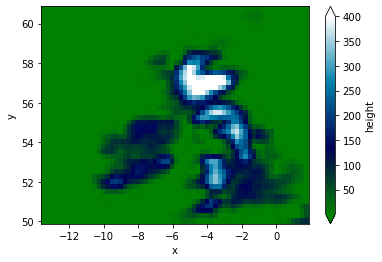

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
cutout.data.height.plot(vmin=1,vmax=400,cmap="ocean")